In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r"C:\Users\User\Downloads\ml")

In [3]:
os.listdir()

['act_pred_train.xlsx',
 'car data.csv',
 'car_done.csv',
 'corr.xlsx',
 'Crop_Recommendation_Model.ipynb',
 'cust_new ml.csv',
 'Data ml.csv',
 'LinearRegressionCarSales.ipynb',
 'Notes25.xlsx',
 'outlier.xlsx']

In [4]:
df=pd.read_csv("car_done.csv")

In [5]:
df.head(4)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0


In [6]:
# Knowing the shape of data ( dimension of data)
df.shape

(157, 14)

* There are `157 records / rows` and `14 columns` in my data set
--------------------------------------------------------------------------

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
dtypes: float64(11), object(3)
memory usage: 17

* There are 11 numerical columns and 3 objective/ categorical variable
* There are some columns where we can see that there are missing value

## EDA : Exploratory Data Analysis 

* Univariate 
    * Study each variable at a time 
* Bivariate 
    * Study two variable at a time 
        1. cat -cat 
        2. cat- num 
        3. num- num

#### Univariate 

In [8]:
# unique categories
# freq 
# freq graph 
# missing value 
df["Manufacturer"].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [9]:
df["Manufacturer"].value_counts()

Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [10]:
df["Manufacturer"].nunique()
# to count how many uniques catogry are there

30

In [11]:
df["Manufacturer"].value_counts(normalize=True)
# to know percentage vise catogry

Dodge         0.070064
Ford          0.070064
Toyota        0.057325
Chevrolet     0.057325
Mercedes-B    0.057325
Mitsubishi    0.044586
Nissan        0.044586
Chrysler      0.044586
Volvo         0.038217
Oldsmobile    0.038217
Lexus         0.038217
Mercury       0.038217
Pontiac       0.038217
Volkswagen    0.038217
Saturn        0.031847
Cadillac      0.031847
Honda         0.031847
Plymouth      0.025478
Acura         0.025478
Buick         0.025478
Audi          0.019108
Jeep          0.019108
Porsche       0.019108
Hyundai       0.019108
BMW           0.019108
Lincoln       0.019108
Saab          0.012739
Subaru        0.012739
Jaguar        0.006369
Infiniti      0.006369
Name: Manufacturer, dtype: float64

In [12]:
df["Manufacturer"].isnull().sum()

0

* There are 30 unique Manufacturer 
* Dodge and Ford are having highest freq
* Jaguar and Infiniti are having least freq
* No missing value found 

In [13]:
def univariate_cat(x):
    missing=x.isnull().sum()
    unique_cnt=x.nunique()
    unique_cat=list(x.unique())
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")

In [14]:
univariate_cat(df["Manufacturer"])

Total missing values : 0

Total count of unique categories: 30

Unique categories :
['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury', 'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo']


In [15]:
univariate_cat(df["Model"])

Total missing values : 0

Total count of unique categories: 156

Unique categories :
['Integra', 'TL', 'CL', 'RL', 'A4', 'A6', 'A8', '323i', '328i', '528i', 'Century', 'Regal', 'Park Avenue', 'LeSabre', 'DeVille', 'Seville', 'Eldorado', 'Catera', 'Escalade', 'Cavalier', 'Malibu', 'Lumina', 'Monte Carlo', 'Camaro', 'Corvette', 'Prizm', 'Metro', 'Impala', 'Sebring Coupe', 'Sebring Conv.', 'Concorde', 'Cirrus', 'LHS', 'Town & Country', '300M', 'Neon', 'Avenger', 'Stratus', 'Intrepid', 'Viper', 'Ram Pickup', 'Ram Wagon', 'Ram Van', 'Dakota', 'Durango', 'Caravan', 'Escort', 'Mustang', 'Contour', 'Taurus', 'Focus', 'Crown Victoria', 'Explorer', 'Windstar', 'Expedition', 'Ranger', 'F-Series', 'Civic', 'Accord', 'CR-V', 'Passport', 'Odyssey', 'Accent', 'Elantra', 'Sonata', 'I30', 'S-Type', 'Wrangler', 'Cherokee', 'Grand Cherokee', 'ES300', 'GS300', 'GS400', 'LS400', 'LX470', 'RX300', 'Continental', 'Town car', 'Navigator', 'Mirage', 'Eclipse', 'Galant', 'Diamante', '3000GT', 'Montero', 'Monter

In [16]:
df["Model"].value_counts()

Neon          2
Integra       1
Cutlass       1
Sentra        1
Altima        1
             ..
Windstar      1
Expedition    1
Ranger        1
F-Series      1
S80           1
Name: Model, Length: 156, dtype: int64

* No missing value
* Total unique cat are 156 


In [17]:
df.dtypes[df.dtypes=="object"].index

Index(['Manufacturer', 'Model', 'Vehicle_type'], dtype='object')

In [18]:
univariate_cat(df["Vehicle_type"])

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['Passenger', 'Car']


In [19]:
df["Vehicle_type"].value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

* No missing value
* Only Two categories [ Car and Passenger]
* Passengers are being sold maximum time 

#### Numerical Variable

In [20]:
def univariate_num(x):
    missing=x.isnull().sum()
    min1=round(x.min(), 2)
    max1=round(x.max(), 2)
    mean=round(x.mean(), 2)
    var=round(x.var(), 2)
    std=round(x.std(),2)
    range1=round(max1-min1, 2)
    q1=round(x.quantile(.25), 2)
    q2=round(x.quantile(.5),2)
    q3=round(x.quantile(.75), 2)
    skew=round( x.skew(), 2)
    kurt=round(x.kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(x)
    plt.show()
    sns.boxplot(data=df, y=x)
    plt.show()
    return myvalue

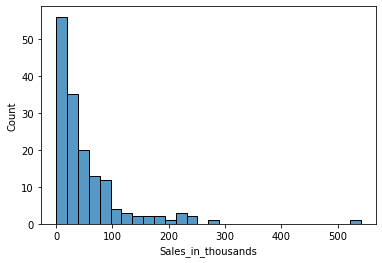

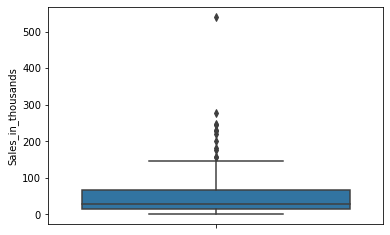

{'missing': 0,
 'min': 0.11,
 'max': 540.56,
 'mean': 53.0,
 'var': 4628.0,
 'std': 68.03,
 'range': 540.45,
 'q1': 14.11,
 'q2': 29.45,
 'q3': 67.96,
 'skewness': 3.41,
 'kurtosis': 17.56}

In [21]:
univariate_num(df["Sales_in_thousands"])

In [22]:
0.11*1000

110.0

In [23]:
540.56*1000

540560.0

In [24]:
df[df["Sales_in_thousands"]==.11]

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel_capacity,Fuel_efficiency
83,Mitsubishi,3000GT,0.11,20.94,Passenger,25.45,3.0,161.0,97.2,72.4,180.3,3.131,19.8,21.0


In [25]:
df[df["Sales_in_thousands"]>=540.56]

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel_capacity,Fuel_efficiency
56,Ford,F-Series,540.561,15.075,Car,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.0


* There are outlier in data 
* No missing values
* Data is positive skewed 
* if our variance is more than mean it means there is outliers

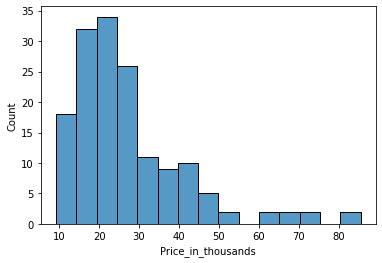

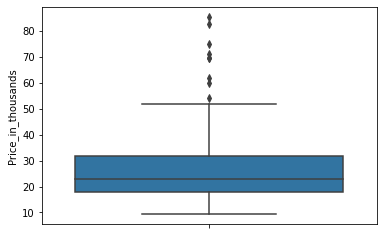

{'missing': 2,
 'min': 9.23,
 'max': 85.5,
 'mean': 27.39,
 'var': 205.97,
 'std': 14.35,
 'range': 76.27,
 'q1': 18.02,
 'q2': 22.8,
 'q3': 31.95,
 'skewness': 1.77,
 'kurtosis': 3.63}

In [26]:
univariate_num(df["Price_in_thousands"])

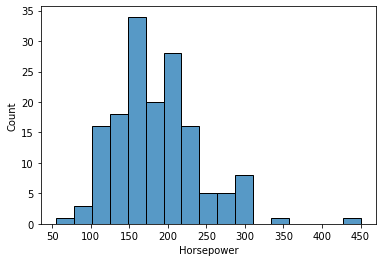

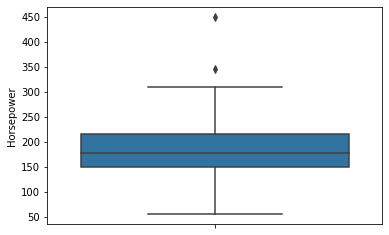

{'missing': 1,
 'min': 55.0,
 'max': 450.0,
 'mean': 185.95,
 'var': 3214.93,
 'std': 56.7,
 'range': 395.0,
 'q1': 149.5,
 'q2': 177.5,
 'q3': 215.0,
 'skewness': 1.0,
 'kurtosis': 2.41}

In [27]:
univariate_num(df["Horsepower"])

### Bivariate Analysis 

* cat-cat 
* cat-num/ num-cat
* num - num

In [29]:
pd.crosstab(df["Manufacturer"], df["Model"])

Model,03-Sep,05-Sep,3000GT,300M,323i,328i,4Runner,528i,A4,A6,...,Town & Country,Town car,V40,V70,Villager,Viper,Voyager,Windstar,Wrangler,Xterra
Manufacturer,,,,,,,,,,,,,,,,,,,,,
Acura,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Audi,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
BMW,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Buick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cadillac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chevrolet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chrysler,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Dodge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Ford,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
pd.crosstab(df["Manufacturer"], df["Vehicle_type"])

Vehicle_type,Car,Passenger
Manufacturer,,
Acura,0,4
Audi,0,3
BMW,0,3
Buick,0,4
Cadillac,1,4
Chevrolet,0,9
Chrysler,1,6
Dodge,6,5
Ford,5,6


#### Cat - num

In [31]:
 df.groupby(["Manufacturer"]).agg({"Sales_in_thousands": [min, max, np.mean]})

Sales_in_thousands                     
                            min      max        mean
Manufacturer                                        
Acura                     8.588   39.384   19.751250
Audi                      1.380   20.397   13.519000
BMW                       9.231   19.747   15.501667
Buick                    27.851   91.561   60.504750
Cadillac                  6.536   63.729   22.435600
Chevrolet                17.947  145.519   61.596111
Chrysler                  7.854   53.480   28.817286
Dodge                     0.916  227.061   82.740818
Ford                     35.068  540.561  183.875909
Honda                    12.855  230.902  118.534800
Hyundai                  29.450   66.692   45.775333
Infiniti                 23.713   23.713   23.713000
Jaguar                   15.467   15.467   15.467000
Jeep                     55.557  157.040   97.717667
Lexus                     3.334   51.238   17.807167
Lincoln                  13.798   48.911   28.544667
Mercedes-B                0.954   28.976   13.013889
Mercury                  14.351   81.174   39.666500
Mitsubishi                0.110   55.616   25.842143
Nissan                   27.308   88.094   57.090714
Oldsmobile                1.112   80.255   29.831500
Plymouth                  1.872   32.734   16.000250
Pontiac                  19.911  131.097   61.755667
Porsche                   1.280    8.982    4.042667
Saab                      9.191   12.115   10.653000
Saturn                    5.223   80.620   33.770000
Subaru                   33.028   47.107   40.067500
Toyota                    9.835  247.994   82.245000
Volkswagen                5.596   83.721   34.868667
Volvo                     3.493   18.969   12.623333

In [32]:
df.groupby(["Vehicle_type"]).agg({"Sales_in_thousands": [np.min, np.max, np.mean, "count"]})

Sales_in_thousands                          
                           amin     amax       mean count
Vehicle_type                                             
Car                       9.126  540.561  80.622293    41
Passenger                 0.110  247.994  43.234345   116

#### num - num

In [33]:
df[["Sales_in_thousands", "Price_in_thousands"]].corr()

,Sales_in_thousands,Price_in_thousands
Sales_in_thousands,1.000000,-0.304734
Price_in_thousands,-0.304734,1.000000


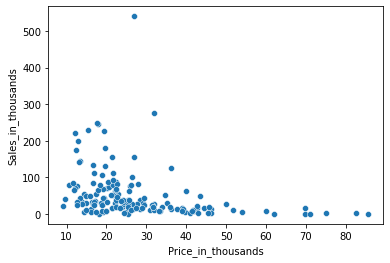

In [34]:
sns.scatterplot( data=df,x=df["Price_in_thousands"],y=df["Sales_in_thousands"])
plt.show()

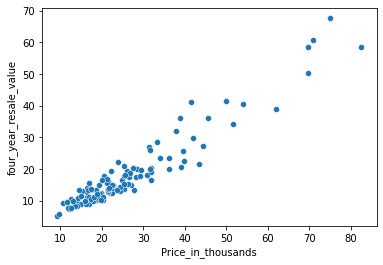

In [35]:
sns.scatterplot( data=df,x=df["Price_in_thousands"],
                y=df["four_year_resale_value"])
plt.show()

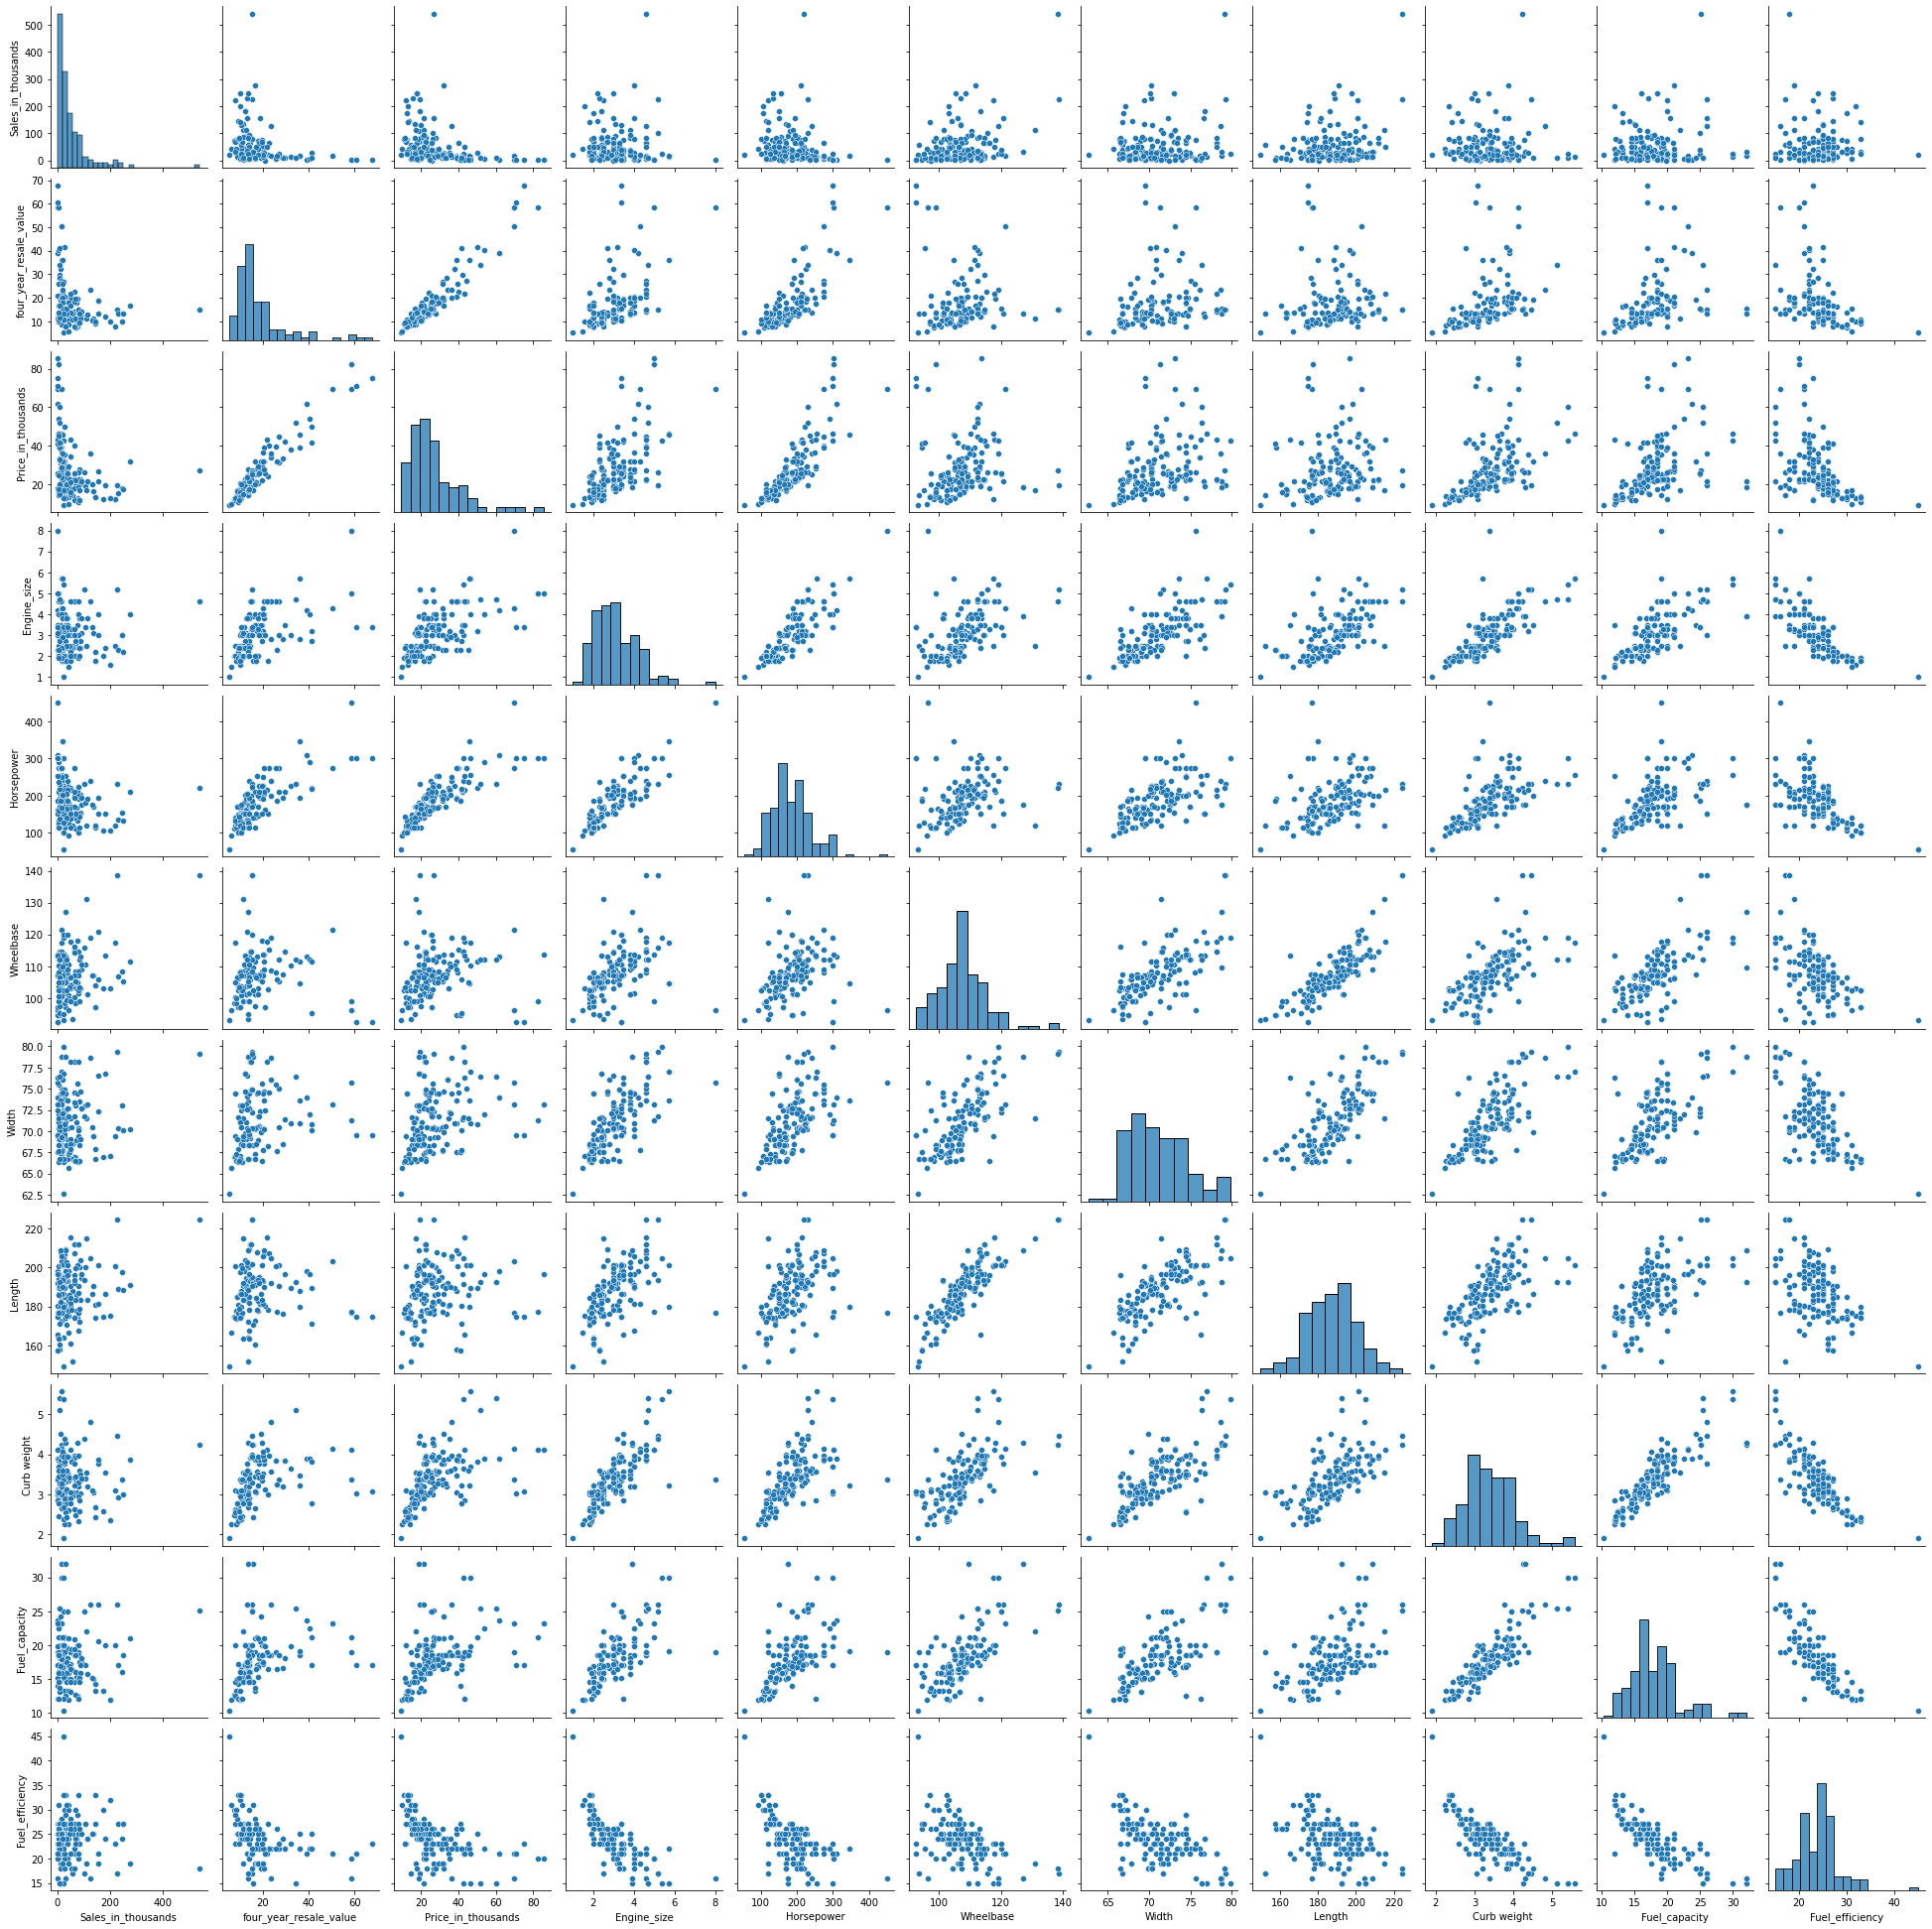

In [36]:
sns.pairplot(df)
plt.show() 

### Missing Value Treatment 
* Methods 
    * Drop
        1. Row Level ( drop if all or maximum rows are missing)
            - (droping is not wise , do treatments, if we have 1000 records and if only 1-2 % are missing we can drop )
        2. Column level (if a column has more than 70% missing - drop it)
           - ( check its importance in model only then delete)
    * Imputation ( filling missing spaces / values )
        1. central values 
            - if columns is continuous and no outliers - fill `mean`
            - if columns is continuous and there are outliers-fill  `median`
            - if variable is categorical - fill `mode`
        2. specific value 
            - fill any other value than central values 
            - if continuous - fill such a value which is very different from the data
            - if categorical - fill any other value other than given categories
        3. use / create any predictive modeling to fill missings 
             - Knearest neigbhors algorithm (knn) ( most used)
        4. ask whenerever the records are possible to get
        5. forward fill and backword fill

In [37]:
df.isnull().sum()

Manufacturer               0
Model                      0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb weight                2
Fuel_capacity              1
Fuel_efficiency            3
dtype: int64

In [38]:
g=pd.DataFrame(df.isnull().sum()/157).reset_index()
g.columns=["Variable", "percentage"]
g["percentage"]=g["percentage"]*100
g

,Variable,percentage
0,Manufacturer,0.000000
1,Model,0.000000
2,Sales_in_thousands,0.000000
3,four_year_resale_value,22.929936
4,Vehicle_type,0.000000
5,Price_in_thousands,1.273885
6,Engine_size,0.636943
7,Horsepower,0.636943
8,Wheelbase,0.636943
9,Width,0.636943


### Treatments

In [39]:
df1=df.dropna()

In [40]:
df.shape

(157, 14)

In [41]:
df1.shape

(117, 14)

In [42]:
40/157

0.25477707006369427

In [43]:
df2=df.fillna(df.median())  # will fill the mean of each column to its missing

C:\Users\User\AppData\Local\Temp\ipykernel_7492\4039334390.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2=df.fillna(df.median())  # will fill the mean of each column to its missing


In [44]:
df2.isnull().sum()

Manufacturer              0
Model                     0
Sales_in_thousands        0
four_year_resale_value    0
Vehicle_type              0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb weight               0
Fuel_capacity             0
Fuel_efficiency           0
dtype: int64

In [45]:
# from sklearn.impute import SimpleImputer
# smt=SimpleImputer(strategy="median")
# df_ar=smt.fit_transform(df)

## Outliers 

* How to know the outliers (Methods)
    * Tukey outliers method 
    * percentile method 
    * etc
* Methods to treatment outliers
    * Drop
    * Capping
    * If outliers are in abundance : separate model/ treatements

In [46]:
f=df2.describe(percentiles=[.01,.02,.03, .04,.05,.25,.5,.75, .9,.95,.96,.97,.98,.99]).T

In [47]:
# f.to_excel("outlier.xlsx")

In [48]:
os.getcwd()

'C:\\Users\\User\\Downloads\\ml'

In [49]:
f

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110,0.93728,1.13216,1.34800,1.60760,1.8708,14.114,29.450,67.956,127.6416,185.3362,215.61840,228.29012,244.02544,260.64532,540.561
four_year_resale_value,157.0,17.180318,10.178562,5.160,6.73640,7.75000,7.80100,7.96400,8.4250,12.545,14.180,18.140,27.0250,39.2750,41.04000,44.30600,57.49860,59.49100,67.550
Price_in_thousands,157.0,27.332261,14.268713,9.235,10.25116,11.56052,11.96968,12.12880,12.4910,18.145,22.799,31.930,43.7880,55.2250,61.54520,69.70800,70.86460,78.32720,85.500
Engine_size,157.0,3.060510,1.041311,1.000,1.55600,1.80000,1.80000,1.80000,1.8000,2.300,3.000,3.500,4.6000,4.7600,5.00000,5.20000,5.37600,5.70000,8.000
Horsepower,157.0,185.894904,56.522319,55.000,96.48000,100.72000,106.68000,110.72000,114.6000,150.000,177.500,215.000,253.8000,300.0000,300.00000,300.64000,302.00000,325.40000,450.000
Wheelbase,157.0,107.484076,7.616872,92.600,92.88000,93.53200,94.50000,94.97200,95.9200,103.000,107.000,112.200,115.4600,119.2000,120.00000,120.95600,126.51600,134.30000,138.700
Width,157.0,71.146178,3.441124,62.600,66.09200,66.40000,66.46800,66.50000,66.5000,68.400,70.550,73.400,76.1800,78.2000,78.20000,78.73200,78.80000,79.18800,79.900
Length,157.0,187.347134,13.388708,149.400,154.96800,158.20000,160.87600,163.30000,163.7000,177.600,187.900,196.100,203.3400,208.5000,208.95600,212.00000,214.64000,219.21600,224.500
Curb weight,157.0,3.377567,0.626460,1.895,2.24560,2.33284,2.35804,2.40328,2.4240,2.975,3.342,3.778,4.1174,4.3884,4.45176,4.61216,5.07816,5.39652,5.572
Fuel_capacity,157.0,17.947134,3.875905,10.300,11.90000,12.01200,12.10000,12.19600,12.5000,15.800,17.200,19.500,23.2000,25.4000,25.85600,26.00000,29.52000,30.88000,32.000


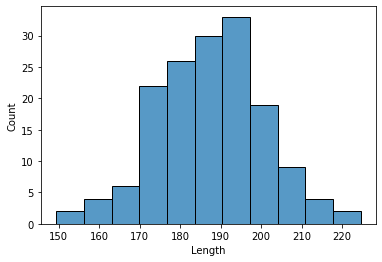

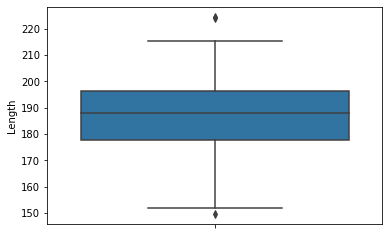

{'missing': 0,
 'min': 149.4,
 'max': 224.5,
 'mean': 187.35,
 'var': 179.26,
 'std': 13.39,
 'range': 75.1,
 'q1': 177.6,
 'q2': 187.9,
 'q3': 196.1,
 'skewness': -0.06,
 'kurtosis': 0.32}

In [50]:
univariate_num(df2["Length"])

In [51]:
df2.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
dtype: object

In [52]:
ob_var=df2.dtypes[df2.dtypes=="object"].index

In [53]:
df_ob=df2[ob_var]

In [54]:
num_var=df2.dtypes[df2.dtypes!="object"].index

In [55]:
df_num=df2[num_var]

In [56]:
### Outlier Capping Function - Method -1
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(.01))
    return x

In [57]:
df_num1=df_num.apply(outliers_percentile)

In [58]:
# df_num1.describe(percentiles=[.01,.02,.03, .04,.05,.25,.5,.75, .9,.95,.96,.97,.98,.99]).T

In [59]:
df3=pd.concat([df_ob, df_num1], axis=1)

### Converting non numeric to numeric

#### Type of non numeric
* Nominal
    * drop nominal columns
* ordinal (small , mediam , large) ( ranks )
    * mark by number labeling ( small =0, mediam=1, large=2)
* Categorical ( Job cat , Gender )
    * Dummy Creation/ OnehotEncoder  

    

In [60]:
univariate_cat(df2["Manufacturer"])

Total missing values : 0

Total count of unique categories: 30

Unique categories :
['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury', 'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo']


In [61]:
df2["Model"].value_counts()

Neon          2
Integra       1
Cutlass       1
Sentra        1
Altima        1
             ..
Windstar      1
Expedition    1
Ranger        1
F-Series      1
S80           1
Name: Model, Length: 156, dtype: int64

In [62]:
df3.drop(["Model", "Manufacturer"], axis=1, inplace=True)

In [63]:
df3.dtypes

Vehicle_type               object
Sales_in_thousands        float64
four_year_resale_value    float64
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
dtype: object

In [64]:
df3["Vehicle_type"].value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [65]:
df3=pd.get_dummies(data=df3, columns=["Vehicle_type"] , drop_first=True)

### Multicollinearity / correlation 

In [66]:
cr=df3.corr()
cr 

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel_capacity,Fuel_efficiency,Vehicle_type_Passenger
Sales_in_thousands,1.000000,-0.277074,-0.359528,-0.012365,-0.253747,0.278212,0.095055,0.199873,-0.032913,0.045528,0.036917,-0.230289
four_year_resale_value,-0.277074,1.000000,0.794152,0.437029,0.650880,-0.039570,0.173841,0.046335,0.281398,0.273146,-0.343529,0.083792
Price_in_thousands,-0.359528,0.794152,1.000000,0.618905,0.846112,0.117933,0.334113,0.161776,0.527793,0.433726,-0.508343,0.043715
Engine_size,-0.012365,0.437029,0.618905,1.000000,0.817919,0.521649,0.708289,0.581820,0.796447,0.701984,-0.760849,-0.279104
Horsepower,-0.253747,0.650880,0.846112,0.817919,1.000000,0.330965,0.549999,0.432683,0.644264,0.533713,-0.616503,-0.013517
Wheelbase,0.278212,-0.039570,0.117933,0.521649,0.330965,1.000000,0.685065,0.835972,0.658629,0.661311,-0.498321,-0.382329
Width,0.095055,0.173841,0.334113,0.708289,0.549999,0.685065,1.000000,0.708215,0.716930,0.654485,-0.592825,-0.240367
Length,0.199873,0.046335,0.161776,0.581820,0.432683,0.835972,0.708215,1.000000,0.626943,0.564550,-0.417942,-0.127859
Curb weight,-0.032913,0.281398,0.527793,0.796447,0.644264,0.658629,0.716930,0.626943,1.000000,0.869463,-0.831516,-0.517147
Fuel_capacity,0.045528,0.273146,0.433726,0.701984,0.533713,0.661311,0.654485,0.564550,0.869463,1.000000,-0.823686,-0.591339


In [67]:
cr.to_excel("corr.xlsx")

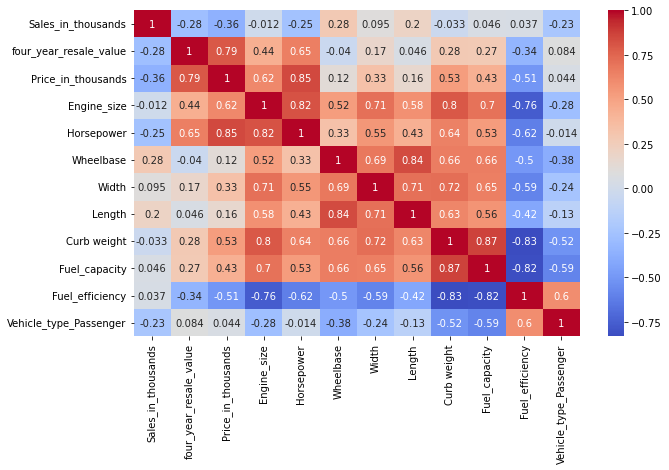

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

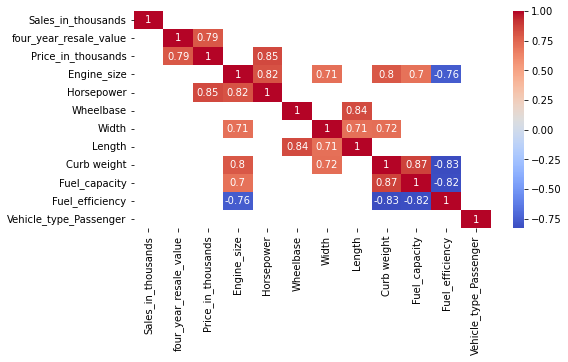

In [69]:
cr1=cr[abs(cr)>.7]

plt.figure(figsize=(8,4))
sns.heatmap(cr1, annot=True, cmap="coolwarm")
plt.show()

* To find non corelated variable : we can use VIF ( Variance inflation Factor)
* if we are generating normal model drop those features which have vif of more than 10
* If we are into medical modeling , drop those features which have vif of more than 2 or 3
* jiska VIF zada ho usko htate jao

In [70]:
df3.isnull().sum()

Sales_in_thousands        0
four_year_resale_value    0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb weight               0
Fuel_capacity             0
Fuel_efficiency           0
Vehicle_type_Passenger    0
dtype: int64

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df3[[ 'Price_in_thousands',
       'Engine_size',  
         'Fuel_efficiency', "Vehicle_type_Passenger"]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values(by=["VIF"], ascending=False)

,feature,VIF
1,Engine_size,14.122342
2,Fuel_efficiency,12.137613
0,Price_in_thousands,8.855448
3,Vehicle_type_Passenger,6.049114


### Normality Assumption

Y should be normally distributed
* By Graph ( Histogram -sns) (distplot-sns)
* Hypothesis Testing ( Shapiro -Sample size < 5000) ( Jarque Bera Sample Size > 5000)


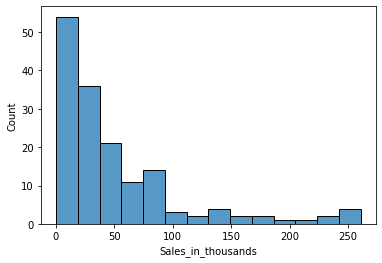

In [72]:
sns.histplot(df3["Sales_in_thousands"])
plt.show()

In [73]:
from scipy.stats import shapiro

In [74]:
shapiro(df3["Sales_in_thousands"])

ShapiroResult(statistic=0.7552342414855957, pvalue=6.811577652154855e-15)

As we know that data is not normally distributed so we have two options
1. Use Techniques which does not have an assumtions of Normality 
2. If you wish to use Linear Reg, trnasform  the data to make it normal
    * Transformation (Square, squareroot, cube, cube root , log,COXbox transformation et...)

<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Count'>

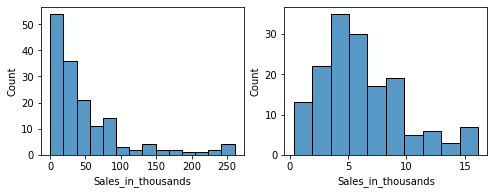

In [75]:
plt.figure(figsize=(8,6))
plt.subplot(221)
sns.histplot(df3["Sales_in_thousands"])
plt.subplot(222)
sns.histplot(np.sqrt(df3["Sales_in_thousands"]))

In [76]:
shapiro(np.sqrt(df3["Sales_in_thousands"]))

ShapiroResult(statistic=0.9356706738471985, pvalue=1.5567044329145574e-06)

<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Count'>

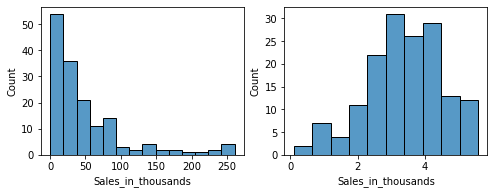

In [77]:
plt.figure(figsize=(8,6))
plt.subplot(221)
sns.histplot(df3["Sales_in_thousands"])
plt.subplot(222)
sns.histplot(np.log1p(df3["Sales_in_thousands"]))

In [78]:
shapiro(np.log1p(df3["Sales_in_thousands"]))

ShapiroResult(statistic=0.9831066727638245, pvalue=0.05211321637034416)

In [79]:
df3["log_Sale"]=np.log1p(df3["Sales_in_thousands"])

## Model Development 

* Seperate x, y
* Split into Train and Test
* run model on Train Data and validate on train and test ( MSE, RMSE, MAE, MAPE)


In [80]:
x=df3[['Price_in_thousands',
       'Engine_size',  
         'Fuel_efficiency', "Vehicle_type_Passenger"]]
y=df3["log_Sale"]

In [81]:
from sklearn.model_selection import train_test_split  # Train test split
from sklearn.linear_model import LinearRegression     # Model development
from sklearn import metrics                            # Model evaluate/

In [82]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.25,random_state=0)

In [83]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [84]:
# R^2 : How much % of Variance can be explained  by this model/ variables
# in regreassion score mean R^2
# train and test r^2 should be close(0-5)
# train-78 , test-68 (overfit)
# train-67 , test-81 (underfit)
# train-73 , test-72 (generalized model)
print("Train R^2 : ", reg.score(x_train, y_train))

Train R^2 :  0.46875092653580697


In [85]:
print("Test R^2 : ", reg.score(x_test, y_test))

Test R^2 :  0.39311710488194607


In [86]:
pred_test=np.expm1(reg.predict(x_test))
pred_test
# we have taken log1 to make data normal because it was not normally distributed so now we have to take anti-log(expm1)

array([ 21.42674015, 100.78432154,  52.69053192,  53.17463863,
        41.93839831,  60.77317234,  50.74602163,  10.53088854,
        47.39648288,   2.05288276,  38.72819611,  27.59662326,
        54.59619972,  32.98765837,  38.62009271,  54.83510553,
        10.38217189,   9.16665989,  46.6395327 ,  73.88113766,
        55.77512479,  69.80618435,  40.06863015,  13.72259778,
       148.61100876,  24.24420597,  22.7522449 ,  44.23386473,
        37.1274325 ,  20.62662742,  61.4821723 ,  33.35671235,
        25.66667607,   6.9594705 ,  14.77670331,  70.70412204,
        14.00466596,   5.70180082,  16.87798524,   7.67918171])

In [87]:
pred_train=np.expm1(reg.predict(x_train))
pred_train

array([72.74872833, 38.03121175, 24.22918445, 60.0581415 , 34.75959542,
       57.31312598, 32.49189015, 22.76677381, 71.57670012, 44.41007582,
        9.03731187, 35.49313806, 15.61772238, 38.01952999, 41.59270312,
       83.48730365, 15.09541793, 12.41285937, 33.02482916, 73.72623917,
       47.33028637, 25.66555668, 16.77840786, 32.06112171,  0.8657614 ,
       31.34792833, 75.49798132, 60.77013259,  2.53345617, 35.10799162,
       45.72742628, 49.53212846, 56.18785821, 39.28749471, 33.43744088,
       43.77064345,  5.74602022, 51.03917174, 51.98236409, 19.34720251,
       34.72792719, 42.08687212, 26.55846788, 10.17672328, 12.60312343,
       51.27097446,  4.09438467, 86.69368248, 48.54578782, 26.21212198,
       38.48649049, 30.22566877, 62.51713202, 25.32401291,  0.79320171,
       58.43468904, 24.05007265, 61.62700402, 38.85033232, 68.27275794,
       58.42299309, 42.35560509, 22.94537805, 28.07545781, 92.74972018,
       30.64260592, 56.65048047, 30.22897813, 17.91624174, 57.93

In [88]:
y_train=np.expm1(y_train)
y_train

27     107.995
110     80.255
80      42.541
89      81.174
18      14.785
        ...   
9       17.527
103     79.853
67      55.557
117      1.872
47     113.369
Name: log_Sale, Length: 117, dtype: float64

In [89]:
y_test=np.expm1(y_test)

In [90]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 2758.3957792680503
Train rmse 52.520432017149766
Train MAE 30.42033202259538
Train MAPE 2.194581333447367


In [91]:
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 2476.872368615725
Test rmse 49.76818631028988
Test MAE 30.658090677010392
Test MAPE 1.7871623427878867


In [93]:
gh=pd.DataFrame({"y_act":y_train, "y_pred": pred_train})

### model prediction on new data

In [94]:
reg.coef_      #m values(weight)

array([-0.05623103,  0.67116536,  0.13088956, -0.84022452])

In [95]:
reg.intercept_ #c value(weights)

0.3871121348044517

In [96]:
x.columns

Index(['Price_in_thousands', 'Engine_size', 'Fuel_efficiency',
       'Vehicle_type_Passenger'],
      dtype='object')

In [97]:
nd=pd.DataFrame({"Price_in_thousand":[22],"Engine_size":[2],"Fuel_efficiency":[24],"Vehicle_type_Passenger":[1]})

In [98]:
np.expm1(reg.predict(nd))

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_in_thousand
Feature names seen at fit time, yet now missing:
- Price_in_thousands

  warnings.warn(message, FutureWarning)


array([15.33785901])